## Pre-Process Tweets

In [37]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import os
from tqdm import notebook
from tqdm.notebook import tqdm
import time

In [39]:

for n, el in enumerate(notebook.tqdm([0, 1, 3, 56, 28, 129, 123904, 23], desc="Iteration", disable=False)):
    time.sleep(1)

#### Example of how to download the tweets

In [67]:
os.system('python Exporter.py --username "matteosalvinimi" --since 2019-1-1 --until 2019-12-31 --output "2019eg.csv"')

0

### 1. Create full dataset

In [8]:
df2016 = pd.read_csv('tweet2016.csv', sep=';').text
df2017 = pd.read_csv('tweet2017.csv', sep=';').text
df2018 = pd.read_csv('tweet2018.csv', sep=';').text
df2019 = pd.read_csv('tweet2019.csv', sep=';').text
print('Lenght of the annual tweets dataset: {}'.format([df.shape[0] for df in [df2016, df2017, df2018, df2019]]))
df2019.head()

Lenght of the annual tweets dataset: [4042, 3977, 4926, 9698]


0    Migliore risposta alla arrogante e nervosetta ...
1    Buonanotte Amici, sempre con il sorriso, la co...
2    Pronti a salire le scale tutti insieme, per sa...
3    Girando per tutta la regione sento voglia di p...
4    Non vedo l'ora che arrivi questo 26 gennaio: p...
Name: text, dtype: object

### 2. Exctracting text

In [9]:
text = []
for df in [df2016, df2017, df2018, df2019]:
    text.extend(list(df.values))
print('Tweet number: {}'.format(len(text)))

Tweet number: 22643


### 3. Cleaning Text

Here we try to clean the text from *URLs*. We noticed that the *URLs* occurs only at the end so we split the tweets by *http* and retrieve the first part.

In [19]:
cleaned_from_url = []
n = 0
k = 0
for tweet in tqdm(text):
    try:
        if 'http' in tweet:
            non_url_text = str(tweet.split('http')[0]).split('>')[0]
            if n < 3:
                if n == 0:
                    print('---------------')
                    print('---------------')
                print('BEFORE:\n-{}\n'.format(tweet))
                print('AFTER:\n-{}'.format(str(non_url_text)))
                print('---------------')
                print('---------------')
            n += 1
            cleaned_from_url.append(non_url_text)
        else:
            clearned_from_url.append(tweet)
    except:
        cleaned_from_url.append(tweet)
        k += 1
        pass
print('Number of tweet cleaned: {}'.format(n))

---------------
---------------
BEFORE:
-Anche grazie alla vostra civile protesta, parroco di Potenza toglie Madonna col burqa e smonta presepe islamico"!http://www.lastampa.it/2016/12/29/multimedia/italia/sconfitto-il-parroco-il-presepe-con-la-madonna-in-abiti-arabi-stato-rimosso-LAcbjnZ7qB5Y0u56m7JLTN/pagina.html …"

AFTER:
-Anche grazie alla vostra civile protesta, parroco di Potenza toglie Madonna col burqa e smonta presepe islamico"!
---------------
---------------
BEFORE:
-ATTENZIONE! Adesso che le ronde le fa il PD sono gentili" e "democratiche"...http://bologna.repubblica.it/cronaca/2016/12/29/news/_le_nostre_ronde_di_sinistra_la_sicurezza_non_e_un_tabu_-155028531/ …"

AFTER:
-ATTENZIONE! Adesso che le ronde le fa il PD sono gentili" e "democratiche"...
---------------
---------------
BEFORE:
-In diretta con voi dalla festa Lega di Albino, Bergamo. Fatemi compagnia, Amici. Voi che cosa state facendo? > https://www.facebook.com/salviniofficial/videos/10154379824518155/ …

AFTER:

###  4. Writing text file

In [28]:
with open('salvini_tweets.txt', 'w', encoding='utf-8') as out_file:
    for tweet in tqdm(cleaned_from_url):
        try:
            out_file.write(tweet.lower())
            out_file.write('\n')
        except:
            pass

### 5. Random Analysis

In [124]:
### Check some sentences where "salvini:" is present
n = 0
for i in tqdm(text):
    try:
        if "salvini:" in i:
            print(i)
            n += 1
        if n == 10:
            break
    except:
        continue

# salvini: UE non ci aiuta su NULLA, se è così prima se ne esce e meglio è. # dimartedi # votosubito
# salvini: inizio a pensare seriamente che qualcuno cerchi lo scontro sociale # QuintaColonna
# salvini: L'Italia è una DISCARICA? Ha dei CONFINI oppure no? # matrixpic.twitter.com/jDPC5QpIso
# Salvini su # leggesalvini: nulla di disumano come scrive qualcuno, semplicemente si mettono delle regole “più europee”. # MeetMillennials
# Salvini su # decretosalvini: ai richiedenti asilo che delinquono verrà sospesa la domanda di asilo. Chi commette reati verrà ESPULSO. # Mattino5
# Salvini su # decretosalvini: ritengo sia normale che se ti becco a delinquere, strappo la tua domanda di asilo e torni a casa tua. # QuartaRepubblicapic.twitter.com/1ffJVItdQy



### 6. Histogram of frequencies

In [94]:
d = {}
for tweet in tqdm(text):
    try:
        for word in tweet.split():
            word = word.lower()
            if word in d.keys():
                d[word] += 1
            else:
                d[word] = 1
    except:
        pass
df = pd.DataFrame(index = d.keys())
df['counts'] = d.values()
df.head()

,counts
"obama,",2
peggior,6
presidente,203
storia,98
usa.,4


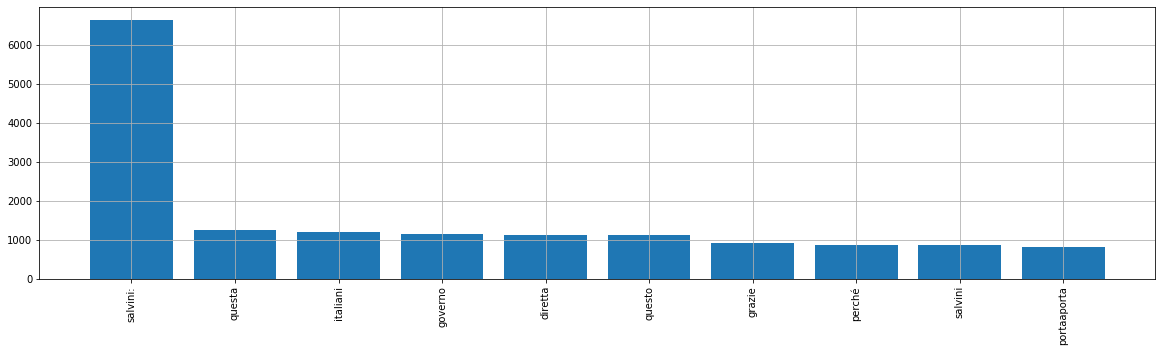

In [119]:
value_counts = sorted([(d[k], k) for k in d.keys() if len(k) > 5], reverse = True)
plt.figure(figsize=(20, 5))
plt.bar([i[1] for i in value_counts][0:10], [i[0] for i in value_counts][0:10])
plt.xticks(rotation=90)
plt.grid()
plt.show()